## Observations and Insights 

In [505]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as pearsonr
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_trial = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")

# Display the data table for preview

combined_mouse_trial.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [506]:
# Checking the number of mice.
combined_mouse_trial.nunique()
combined_mouse_trial["Mouse ID"].count()

1893

In [507]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_mouse_trial[combined_mouse_trial.duplicated()]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [508]:
# Optional: Get all the data for the duplicate mouse ID. 



In [509]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_combined_mouse_trial = combined_mouse_trial.drop(index = [909])
clean_combined_mouse_trial

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [510]:
# Checking the number of mice in the clean DataFrame.
clean_combined_mouse_trial["Mouse ID"].count()



1892

## Summary Statistics

In [511]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# Create table with mean of the tumor volume for each Drug regimen

tumor_mean = combined_mouse_trial.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

tumor_mean_df = pd.DataFrame(tumor_mean).reset_index()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Preview Df

tumor_mean_df.head()



,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [512]:
# Create table with median of the tumor volume for each Drug regimen

tumor_median = combined_mouse_trial.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

tumor_median_df = pd.DataFrame(tumor_median).reset_index()


# Preview Df

tumor_median_df


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.854632
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [513]:
# Create table with variance of the tumor volume for each Drug regimen

tumor_variance = combined_mouse_trial.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

tumor_variance_df = pd.DataFrame(tumor_variance).reset_index()


# Preview Df

tumor_variance_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,42.351070
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [514]:
# Create table with Standard Deviation of the tumor volume for each Drug regimen

tumor_STDV = combined_mouse_trial.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

tumor_STDV_df = pd.DataFrame(tumor_STDV).reset_index()


# Preview Df

tumor_STDV_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.507770
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [515]:
# Create table with standard error of the mean of the tumor volume for each Drug regimen

tumor_sem = combined_mouse_trial.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

tumor_sem_df = pd.DataFrame(tumor_sem).reset_index()


# Preview df

tumor_sem_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.512884
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [516]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


Drug_stats_df = pd.DataFrame({"Mean" : tumor_mean, "Median" : tumor_median , "Variance" : tumor_variance ,"StanDev" : tumor_STDV, "SEM" :  tumor_sem})
Drug_stats_df

,Mean,Median,Variance,StanDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [517]:
#Find out the number of mice per drug

mice_count = clean_combined_mouse_trial["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

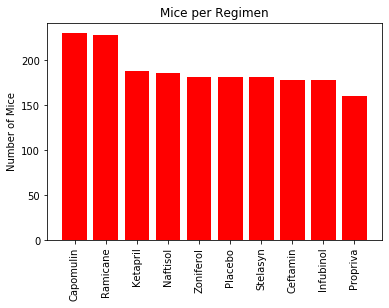

In [518]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


y_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 160]
x_axis = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']

plt.bar(x_axis, y_count, color="r", align='center', alpha=1)
plt.xticks(x_axis, rotation = 'vertical')

plt.ylabel('Number of Mice')
plt.title('Mice per Regimen')
plt.show()

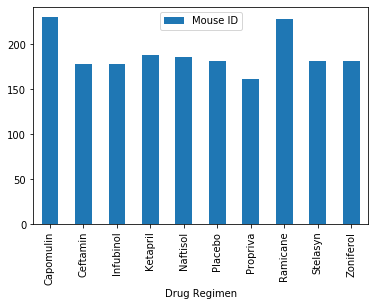

In [519]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_reg = combined_mouse_trial.groupby(["Drug Regimen"])
Drug_reg_df = pd.DataFrame(Drug_reg["Mouse ID"].count())
Drug_reg_df.plot(kind = "bar")

Text(0, 0.5, 'Distribution Percentage')

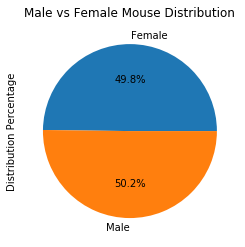

In [520]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_gender = clean_combined_mouse_trial.groupby("Sex").nunique()
MID = group_gender["Mouse ID"]

MID.plot(kind="pie", autopct='%1.1f%%')
plt.title('Male vs Female Mouse Distribution')
plt.ylabel('Distribution Percentage')



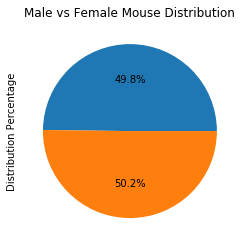

In [521]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(MID, autopct='%1.1f%%')
plt.title('Male vs Female Mouse Distribution')
plt.ylabel('Distribution Percentage')
plt.show()


## Quartiles, Outliers and Boxplots

In [522]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

FourTum = combined_mouse_trial[combined_mouse_trial["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
FourTum

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [523]:
FourTumMax = FourTum.groupby(["Mouse ID"])["Timepoint"].max()
FourTumMax

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [524]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

TumMerge = pd.merge(FourTum, FourTumMax, on = ["Timepoint" , "Mouse ID"])
TumMerge = TumMerge[[ "Mouse ID", "Drug Regimen" , "Tumor Volume (mm3)" , "Timepoint"]]
TumMerge

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,k403,Ramicane,22.050126,45
1,s185,Capomulin,23.343598,45
2,x401,Capomulin,28.484033,45
3,m601,Capomulin,28.430964,45
4,g791,Ramicane,29.128472,45
...,...,...,...,...
95,x822,Ceftamin,61.386660,45
96,y163,Infubinol,67.685569,45
97,y769,Ceftamin,68.594745,45
98,y865,Ceftamin,64.729837,45


In [525]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

#Capomulin
CapTum = TumMerge.loc[TumMerge["Drug Regimen"] == "Capomulin"]
CapTum = CapTum["Tumor Volume (mm3)"]
CapQuar = CapTum.quantile([.25,.5,.75])
CapLowerq = CapQuar[0.25]
CapUpperq = CapQuar[0.75]
CaIQR = CapUpperq-CapLowerq
CaIQR

#Ramicane
RamTum = TumMerge.loc[TumMerge["Drug Regimen"] == "Ramicane"]
RamTum = RamTum["Tumor Volume (mm3)"]
RamQuar = RamTum.quantile([.25,.5,.75])
RamLowerq = RamQuar[0.25]
RamUpperq = RamQuar[0.75]
RIQR = RamUpperq-RamLowerq
RIQR

#Infubinol
InfTum = TumMerge.loc[TumMerge["Drug Regimen"] == "Infubinol"]
InfTum = InfTum["Tumor Volume (mm3)"]
InfQuar = InfTum.quantile([.25,.5,.75])
InfLowerq = InfQuar[0.25]
InfUpperq = InfQuar[0.75]
IIQR = InfUpperq-InfLowerq
IIQR

#Ceftamin
CefTum = TumMerge.loc[TumMerge["Drug Regimen"] == "Ceftamin"]
CefTum = CefTum["Tumor Volume (mm3)"]
CefQuar = CefTum.quantile([.25,.5,.75])
CefLowerq = CefQuar[0.25]
CefUpperq = CefQuar[0.75]
CeIQR = CefUpperq-CefLowerq
CeIQR

# Create list with each drug's tumor volume data 

TumVolData = [CapTum, RamTum, InfTum, CefTum]

In [526]:

# Determine outliers using upper and lower bounds
    
#Capomulin
Cap_lowb = CapLowerq - (1.5*CaIQR)
Cap_upperb = CapUpperq + (1.5*CaIQR)
Cap_Out = CapTum.loc[(CapTum < Cap_lowb) | (CapTum > Cap_upperb)]

#Ramicane
Ram_lowb = RamLowerq - (1.5*RIQR)
Ram_upperb = RamUpperq + (1.5*RIQR)
Ram_Out = RamTum.loc[(RamTum < Ram_lowb) | (RamTum > Ram_upperb)]

#Infubinol
Inf_lowb = InfLowerq - (1.5*IIQR)
Inf_upperb = InfUpperq + (1.5*IIQR)
Inf_Out = InfTum.loc[(InfTum < Inf_lowb) | (InfTum > Inf_upperb)]
 
#Ceftamin
Cef_lowb = CefLowerq - (1.5*CeIQR)
Cef_upperb = CefUpperq + (1.5*CeIQR)
Inf_Out = InfTum.loc[(InfTum < Inf_lowb) | (InfTum > Inf_upperb)]



print(Inf_Out)

58    36.321346
Name: Tumor Volume (mm3), dtype: float64


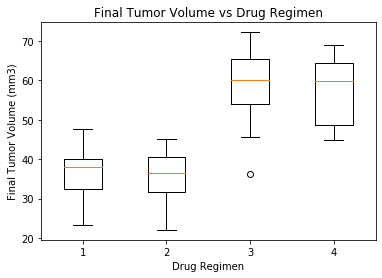

In [527]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


final = TumMerge["Tumor Volume (mm3)"]
fix1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume vs Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(TumVolData)
plt.show()

## Line and Scatter Plots

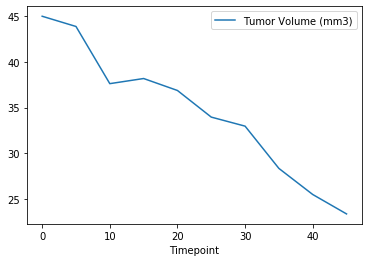

In [528]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Chose a random mouse

CapLine = FourTum.loc[FourTum["Mouse ID"] == "s185"]
CapLine.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")



In [529]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Should see larger tumor volume for heavier mice
#groupby then average

AvgVol = FourTum.loc[FourTum ["Drug Regimen"] == "Capomulin"]
AvgVol = AvgVol.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

Weight = FourTum.loc[FourTum ["Drug Regimen"] == "Capomulin"]
Weight = Weight.groupby(["Mouse ID"])["Weight (g)"].max()

AvgVolWeight = pd.DataFrame({"Average Volume" : AvgVol, "Weight" : Weight})
AvgVolWeight

#WeightVolPlot = AvgVolWeight.plot.scatter(x ='Average Volume', y = 'Weight' , colormap = 'viridis')

#AvgVol is the y axis
#Weight is the x axis


,Average Volume,Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


## Correlation and Regression

The correlation between Mouse Weight and Average Volume is 0.84


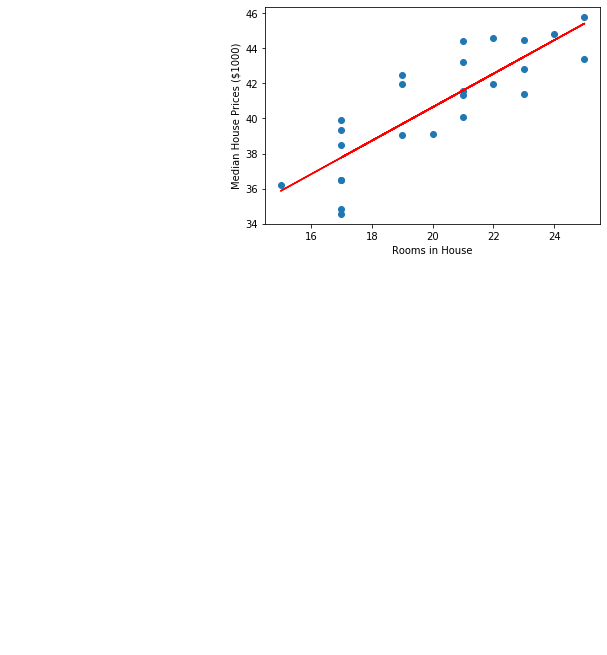

In [530]:
# Calculate the correlation coefficient and linear regression model 


MouseWeight = AvgVolWeight.iloc[:,1]
AverageVol = AvgVolWeight.iloc[:,0]

correlation = st.pearsonr(MouseWeight,AverageVol)
print(f"The correlation between Mouse Weight and Average Volume is {round(correlation[0],2)}")


# for mouse weight and average tumor volume for the Capomulin regimen



x_values = AvgVolWeight['Weight']
y_values = AvgVolWeight['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
